In [31]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs

# Census API Key
from config import api_key
c = Census(api_key, year=2017)

# import sys
# 'geopandas' in sys.modules

In [ ]:
# # Run Census Search to retrieve data on all zip codes (2013 ACS5 Census)
# # See: https://github.com/CommerceDataService/census-wrapper for library documentation
# # See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels
# census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
#                           "B19301_001E",
#                           "B17001_002E"), {'for': 'zip code tabulation area:*'})

# #"https://api.census.gov/data/2014/pep/natstprc?get=STNAME,POP&DATE_=7&for=state:*""

# # Convert to DataFrame
# census_pd = pd.DataFrame(census_data)

In [ ]:
# census_pd.head()

In [ ]:
# # census_data2 = requests.get("https://api.census.gov/data/2013/acs/acs1?get=NAME&for=county:073&in=state:01+place:07000").json()
# census_data2 = requests.get("https://api.census.gov/data/2014/pep/natstprc?get=STNAME,POP&DATE_=7&for=county:073&in=state:01+place:07000").json()
# Census API documentation: https://www.census.gov/content/dam/Census/data/developers/api-user-guide/api-guide.pdf
# census_data2 = c.acs5.get(("NAME"), {'for': 'zip code tabulation area:*'}) #zip code tabulation area:*
# retrieve census tracts per place: https://www.youtube.com/watch?v=t-7z8a8TbxI
m_census_data2 = c.acs5.get(('NAME','B01003_001E', 'B19013_001E', 'B17001_002E', 'B08301_001E', 'B08301_003E', 'B08101_041E',), geo={'for': 'tract:*',
                       'in': 'state:{} county:053'.format(states.MN.fips)}) #  county:053

# census_data2 = requests.get("http://api.census.gov/data/2013/asc?key=b540517342f1e07a5145d767bd4355cba7bea8d1&get=NAME&for=tract:*&in=state:02+county:170")

In [ ]:
m_census_data2
# Convert to DataFrame
m_census_pd = pd.DataFrame(m_census_data2)

# Column Reordering
m_census_pd = m_census_pd.rename(columns={"B01003_001E": "Population",
                                      "B19013_001E": "Median Household Income",
                                      "B17001_002E": "Poverty count",
                                      "B08301_001E": "Commuting count",
                                      "B08301_003E": "Commuting by car count",
                                      "B08101_041E": "Commuting OTHER count",
                                      "NAME": "Name", "tract": "Census Tract"})

# Add in Poverty Rate (Poverty Count / Population)
m_census_pd["Poverty Rate"] = 100 * \
    m_census_pd["Poverty count"].astype(
        int) / m_census_pd["Population"].astype(int)

# Calculate commute by car)
m_census_pd["Car Rate"] = 100 * \
    m_census_pd["Commuting by car count"].astype(
        int) / m_census_pd["Commuting count"].astype(int)

# Calculate commute by OTHER
m_census_pd["Commute OTHER rate"] = 100 * \
    m_census_pd["Commuting OTHER count"].astype(
        int) / m_census_pd["Commuting count"].astype(int)

# Calculate GEOID
m_census_pd["GEOID"] = m_census_pd["state"].astype(str)+m_census_pd["county"]+m_census_pd["Census Tract"]
# f"{m_census_pd["state"]}{m_census_pd["county"]}{m_census_pd["Census Tract"]}"
m_census_pd.head()

In [ ]:
b_census_data = c.acs5.get(('NAME','B01003_001E', 'B19013_001E', 'B17001_002E', 'B08301_001E', 'B08301_003E', 'B08101_041E',), geo={'for': 'tract:*',
                       'in': 'state:{} county:025'.format(states.MA.fips)})

# Convert to DataFrame
b_census_pd = pd.DataFrame(b_census_data)

# Column Reordering
b_census_pd = b_census_pd.rename(columns={"B01003_001E": "Population",
                                      "B19013_001E": "Median Household Income",
                                      "B17001_002E": "Poverty count",
                                      "B08301_001E": "Commuting count",
                                      "B08301_003E": "Commuting by car count",
                                      "B08101_041E": "Commuting OTHER count",
                                      "NAME": "Name", "tract": "Census Tract"})

# Add in Poverty Rate (Poverty Count / Population)
b_census_pd["Poverty Rate"] = 100 * \
    b_census_pd["Poverty count"].astype(
        int) / b_census_pd["Population"].astype(int)

# Calculate commute by car)
b_census_pd["Car Rate"] = 100 * \
    b_census_pd["Commuting by car count"].astype(
        int) / b_census_pd["Commuting count"].astype(int)

# Calculate commute by OTHER
b_census_pd["Commute OTHER rate"] = 100 * \
    b_census_pd["Commuting OTHER count"].astype(
        int) / b_census_pd["Commuting count"].astype(int)

# Calculate GEOID
b_census_pd["GEOID"] = b_census_pd["state"].astype(str)+b_census_pd["county"]+b_census_pd["Census Tract"]

b_census_pd.head()

In [ ]:
p_census_data = c.acs5.get(('NAME','B01003_001E', 'B19013_001E', 'B17001_002E', 'B08301_001E', 'B08301_003E', 'B08101_041E',), geo={'for': 'tract:*',
                       'in': 'state:{} county:051,067,005'.format(states.OR.fips)})

# Convert to DataFrame
p_census_pd = pd.DataFrame(p_census_data)

# Column Reordering
p_census_pd = p_census_pd.rename(columns={"B01003_001E": "Population",
                                      "B19013_001E": "Median Household Income",
                                      "B17001_002E": "Poverty count",
                                      "B08301_001E": "Commuting count",
                                      "B08301_003E": "Commuting by car count",
                                      "B08101_041E": "Commuting OTHER count",
                                      "NAME": "Name", "tract": "Census Tract"})

# Add in Poverty Rate (Poverty Count / Population)
p_census_pd["Poverty Rate"] = 100 * \
    p_census_pd["Poverty count"].astype(
        int) / p_census_pd["Population"].astype(int)

# Calculate commute by car)
p_census_pd["Car Rate"] = 100 * \
    p_census_pd["Commuting by car count"].astype(
        int) / p_census_pd["Commuting count"].astype(int)

# Calculate commute by OTHER
p_census_pd["Commute OTHER rate"] = 100 * \
    p_census_pd["Commuting OTHER count"].astype(
        int) / p_census_pd["Commuting count"].astype(int)

# Calculate GEOID
p_census_pd["GEOID"] = p_census_pd["state"].astype(str)+p_census_pd["county"]+p_census_pd["Census Tract"]

p_census_pd.tail()
print(len(p_census_pd["GEOID"]))

In [ ]:
# load
# df = pd.read_csv('result1.csv', index_col=0)
# manipulate frame here
# ...
# save
m_census_pd.to_csv('census_output/m_census.csv')
b_census_pd.to_csv('census_output/b_census.csv')
p_census_pd.to_csv('census_output/p_census.csv')

In [ ]:
# m_bike = pd.read_csv('census_output/m_bike.csv', index_col=0)
# b_bike = pd.read_csv('census_output/b_bike.csv', index_col=0)
# p_bike = pd.read_csv('census_output/p_bike.csv', index_col=0)
m_merged = pd.read_csv('census_output/m_merged.csv', index_col=0)
m_merged.columns

In [ ]:
# <<<<<<< Minneapolis >>>>>>>
# Sort by median household income, export low 25 to new df, create new column indicating if it is a low 25 census tract
m_merged = m_merged.sort_values("Median Household Incomee", ascending=True)
m_mhi_25 = m_merged.head(25)
m_merged["MHI_25"] = np.where(m_merged['Median Household Incomee']<=m_mhi_25["Median Household Incomee"].max(), 'yes', 'no')

# Sort by poverty rate, export top 25 to new df, create new column indicating if it is a top 25 tract for poverty rate
m_merged = m_merged.sort_values("Poverty Rate", ascending=False)
m_pvt_25 = m_merged.head(25)
m_merged["PVT_25"] = np.where(m_merged['Poverty Rate']>=m_pvt_25["Poverty Rate"].min(), 'yes', 'no')

# # <<<<<<< Boston >>>>>>>
# # Sort by median household income, export low 25 to new df, create new column indicating if it is a low 25 census tract
# b_merged = b_merged.sort_values("Median Household Incomee", ascending=True)
# b_mhi_25 = b_merged.head(25)
# b_merged["MHI_25"] = np.where(b_merged['Median Household Incomee']<=b_mhi_25["Median Household Incomee"].max(), 'yes', 'no')

# # Sort by poverty rate, export top 25 to new df, create new column indicating if it is a top 25 tract for poverty rate
# b_merged = b_merged.sort_values("Poverty Rate", ascending=False)
# b_pvt_25 = b_merged.head(25)
# b_merged["PVT_25"] = np.where(b_merged['Poverty Rate']>=b_pvt_25["Poverty Rate"].min(), 'yes', 'no')

# # <<<<<<< Portland >>>>>>>
# # Portland -  Sort by median household income, export low 25 to new df, create new column indicating if it is a low 25 census tract
# b_merged = b_merged.sort_values("Median Household Incomee", ascending=True)
# b_mhi_25 = b_merged.head(25)
# b_merged["MHI_25"] = np.where(b_merged['Median Household Incomee']<=b_mhi_25["Median Household Incomee"].max(), 'yes', 'no')

# # Sort by poverty rate, export top 25 to new df, create new column indicating if it is a top 25 tract for poverty rate
# b_merged = b_merged.sort_values("Poverty Rate", ascending=False)
# b_pvt_25 = b_merged.head(25)
# b_merged["PVT_25"] = np.where(b_merged['Poverty Rate']>=b_pvt_25["Poverty Rate"].min(), 'yes', 'no')


m_merged.head()

In [ ]:
m_mhi_group = m_merged.groupby(['MHI_25'])
m_mhi_group['MHI_25'].count()

In [6]:
# # Read in the shapefiles of city census tracts ( with their geometry)
m_census_gdf = gpd.read_file("Census_subsets/Mpls_CensusTracts.shp")
# # convert the GEOID field to an integer for merging later
m_census_gdf = m_census_gdf.astype({'GEOID': 'int64'})
b_census_gdf = gpd.read_file("Census_subsets/Bos_CensusTracts.shp")
b_census_gdf = b_census_gdf.astype({'GEOID': 'int64'})
p_census_gdf = gpd.read_file("Census_subsets/Por_CensusTracts.shp")
p_census_gdf = p_census_gdf.astype({'GEOID': 'int64'})

# # Read in the bike trips info
m_bike_df = pd.read_csv('census_output/m_bike.csv', index_col=0)
m_bike_df = m_bike_df.rename(columns={"start station longitude":"s_longitude", "start station latitude":"s_latitude",
    "end station longitude":"e_longitude", "end station latitude":"e_latitude"})
b_bike_df = pd.read_csv('census_output/b_bike.csv', index_col=0)
b_bike_df = b_bike_df.rename(columns={"start station longitude":"s_longitude", "start station latitude":"s_latitude",
    "end station longitude":"e_longitude", "end station latitude":"e_latitude"})
p_bike_df = pd.read_csv('census_output/p_bike.csv', index_col=0)
p_bike_df = p_bike_df.rename(columns={"StartLongitude":"s_longitude", "StartLatitude":"s_latitude",
    "EndLongitude":"e_longitude", "EndLatitude":"e_latitude"})

# # Read in the ACS census data from the census api
m_census_df = pd.read_csv('output/m_census_25.csv', index_col=0)
b_census_df = pd.read_csv('output/b_census_25.csv', index_col=0)
p_census_df = pd.read_csv('output/p_census_25.csv', index_col=0)

# # Merge the census api data to the census geometry data adn export to csv
m_merged = m_census_gdf.merge(m_census_df, on='GEOID')
# m_merged.to_csv('census_output/m_merged.csv')
b_merged = b_census_gdf.merge(b_census_df, on='GEOID')
# b_merged.to_csv('census_output/b_merged.csv')
p_merged = p_census_gdf.merge(p_census_df, on='GEOID')
# p_merged.to_csv('census_output/p_merged.csv')



# Create geo dfs from the city bike data
m_bike_gdf = gpd.GeoDataFrame(
    m_bike_df, geometry=gpd.points_from_xy(m_bike_df.s_longitude, m_bike_df.s_latitude))
b_bike_gdf = gpd.GeoDataFrame(
    b_bike_df, geometry=gpd.points_from_xy(b_bike_df.s_longitude, b_bike_df.s_latitude))
p_bike_gdf = gpd.GeoDataFrame(
    p_bike_df, geometry=gpd.points_from_xy(p_bike_df.s_longitude, p_bike_df.s_latitude))

In [17]:
m_merged[["GEOID", "Median Household Income", "MHI_25"]].tail(100)
m_merged_mhi = m_merged.loc[m_merged["MHI_25"] == "yes", :]
m_merged_mhi

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,Commuting by car count,Commuting OTHER count,state,county,Census Tract,Poverty Rate,Car Rate,Commute OTHER rate,MHI_25,PVT_25
8,27,053,126000,27053126000,1260,Census Tract 1260,G5020,S,987363,0,...,851.0,103.0,27,53,126000,46.050776,41.674829,5.044074,yes,yes
21,27,053,005902,27053005902,59.02,Census Tract 59.02,G5020,S,486608,0,...,605.0,68.0,27,53,5902,52.208955,47.600315,5.350118,yes,yes
23,27,053,003300,27053003300,33,Census Tract 33,G5020,S,616347,0,...,464.0,10.0,27,53,3300,39.517103,50.599782,1.090513,yes,yes
24,27,053,005901,27053005901,59.01,Census Tract 59.01,G5020,S,451926,0,...,449.0,87.0,27,53,5901,40.402728,45.399393,8.796764,yes,yes
25,27,053,006800,27053006800,68,Census Tract 68,G5020,S,480128,0,...,1573.0,167.0,27,53,6800,21.163012,50.416667,5.352564,yes,no
28,27,053,008200,27053008200,82,Census Tract 82,G5020,S,628213,0,...,1290.0,234.0,27,53,8200,29.491450,50.175029,9.101517,yes,no
40,27,053,007801,27053007801,78.01,Census Tract 78.01,G5020,S,271663,0,...,435.0,73.0,27,53,7801,35.825389,41.706616,6.999041,yes,yes
41,27,053,106000,27053106000,1060,Census Tract 1060,G5020,S,683668,0,...,722.0,38.0,27,53,106000,46.954392,57.210777,3.011094,yes,yes
42,27,053,101600,27053101600,1016,Census Tract 1016,G5020,S,1184516,52677,...,419.0,33.0,27,53,101600,33.975482,49.585799,3.905325,yes,yes
46,27,053,003800,27053003800,38,Census Tract 38,G5020,S,847896,80070,...,1597.0,383.0,27,53,3800,42.249240,41.064541,9.848290,yes,yes


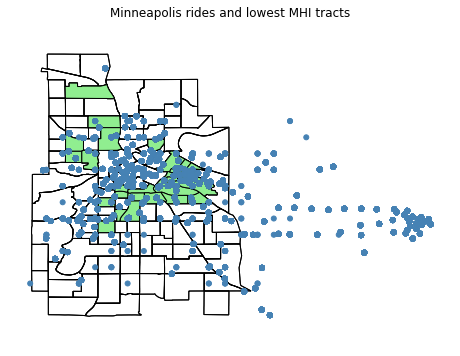

In [36]:
# f, ax = plt.subplots(1, figsize = (6,8))
axis = geoplot.polyplot(m_merged)
geoplot.polyplot(m_merged, ax=axis)
geoplot.polyplot(m_merged_mhi, facecolor="lightgreen", ax=axis)
geoplot.pointplot(m_bike_gdf, ax=axis)
plt.title("Minneapolis rides and lowest MHI tracts")
plt.axis("equal")
plt.savefig("Images/Mpls_Map.png", dpi=300)
plt.show()